<a href="https://colab.research.google.com/github/prievarag/Time_Series_Linear_Regression_IBM/blob/main/IBM_Linear_Regression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Using free data: IBM Daily Adjusted Stock Time Series from Alpha Vantage

In [32]:
# Description: predicting future price of IBM stock

In [33]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
# Import the data
from google.colab import files
files.upload()

Saving daily_adjusted_IBM.csv to daily_adjusted_IBM (1).csv


{'daily_adjusted_IBM.csv': b'timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient\r\n2021.12.30,133.75,134.37,133.33,133.91,133.91,3158111,0,1\r\n2021.12.29,132.4,134.21,132.3,133.35,133.35,4239935,0,1\r\n2021.12.28,131.6,133.22,131.59,132.63,132.63,3447079,0,1\r\n2021.12.27,130.63,131.65,129.95,131.62,131.62,4294499,0,1\r\n2021.12.23,130,130.96,129.52,130.63,130.63,3649044,0,1\r\n2021.12.22,129.06,129.79,127.6,129.75,129.75,3923198,0,1\r\n2021.12.21,127.66,129.3356,127.66,128.97,128.97,4855972,0,1\r\n2021.12.20,125.72,127.2,124.7,127.06,127.06,4941411,0,1\r\n2021.12.17,125.87,128.64,125.2093,127.4,127.4,10382693,0,1\r\n2021.12.16,123.51,126.6399,123.475,125.93,125.93,7280537,0,1\r\n2021.12.15,123.8,124.815,122.18,123.11,123.11,4990028,0,1\r\n2021.12.14,122.35,125.03,122.3,123.76,123.76,5716124,0,1\r\n2021.12.13,123.76,124.3554,120.79,122.58,122.58,6847468,0,1\r\n2021.12.10,124.3,125.33,123.36,124.09,124.09,4966921,0,1\r\n2021.12.09,122.15,123.95,121.79

In [35]:
# Store the data
df = pd.read_csv("daily_adjusted_IBM.csv", index_col="timestamp", parse_dates=["timestamp"])

In [36]:
df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-12-30,133.75,134.3700,133.3300,133.91,133.910000,3158111,0.0,1.0
2021-12-29,132.40,134.2100,132.3000,133.35,133.350000,4239935,0.0,1.0
2021-12-28,131.60,133.2200,131.5900,132.63,132.630000,3447079,0.0,1.0
2021-12-27,130.63,131.6500,129.9500,131.62,131.620000,4294499,0.0,1.0
2021-12-23,130.00,130.9600,129.5200,130.63,130.630000,3649044,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-08-16,143.23,143.7400,142.2300,143.59,135.437376,2786343,0.0,1.0
2021-08-13,142.64,143.5800,142.4400,143.18,135.050655,1908951,0.0,1.0
2021-08-12,142.26,143.1500,142.0766,143.07,134.946900,2089418,0.0,1.0


In [37]:
# Reverse the order of the datafram (because of the timestamp is in reversed order)
df1 = df.iloc[::-1]

In [38]:
df1

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2021-08-10,141.21,141.8110,140.3400,141.38,133.352853,5299869,0.0,1.0
2021-08-11,141.78,142.7685,141.5000,142.13,134.060271,4259952,0.0,1.0
2021-08-12,142.26,143.1500,142.0766,143.07,134.946900,2089418,0.0,1.0
2021-08-13,142.64,143.5800,142.4400,143.18,135.050655,1908951,0.0,1.0
2021-08-16,143.23,143.7400,142.2300,143.59,135.437376,2786343,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-12-23,130.00,130.9600,129.5200,130.63,130.630000,3649044,0.0,1.0
2021-12-27,130.63,131.6500,129.9500,131.62,131.620000,4294499,0.0,1.0
2021-12-28,131.60,133.2200,131.5900,132.63,132.630000,3447079,0.0,1.0


In [39]:
# Creating time-step features
# With time dummy
df1['Time'] = np.arange(len(df1.index))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Time
timestamp,,,,,,,,,
2021-08-10,141.21,141.8110,140.3400,141.38,133.352853,5299869,0.0,1.0,0
2021-08-11,141.78,142.7685,141.5000,142.13,134.060271,4259952,0.0,1.0,1
2021-08-12,142.26,143.1500,142.0766,143.07,134.946900,2089418,0.0,1.0,2
2021-08-13,142.64,143.5800,142.4400,143.18,135.050655,1908951,0.0,1.0,3
2021-08-16,143.23,143.7400,142.2300,143.59,135.437376,2786343,0.0,1.0,4


Text(0.5, 1.0, 'Time Plot of IBM Stock Close Price')

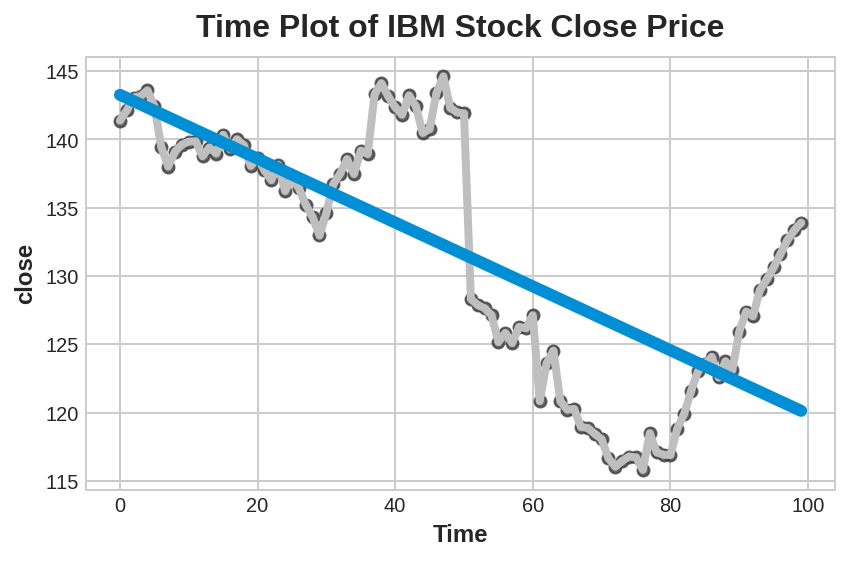

In [40]:
# Plot the Linear Regression line and the close value
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

fig, ax = plt.subplots()
ax.plot('Time', 'close', data=df1, color='0.75')
ax = sns.regplot(x='Time', y='close', data=df1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of IBM Stock Close Price')

In [41]:
# Create and train the model
# Features:
X = df1.loc[:, ['Time']]
# Target:
y = df1.loc[:, 'close']

lin_reg = LinearRegression().fit(X,y)

In [42]:
# print the intercept and the slope
print('Intercept: ', lin_reg.intercept_)
print('Slope: ', lin_reg.coef_)

Intercept:  143.26591485148518
Slope:  [-0.23367303]


In [43]:
# Make prediction for the data
# We will use the linear regression equation:
# y = ax + b

y_pred = lin_reg.coef_ * X + lin_reg.intercept_
df1['Prediction'] = y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
print(df1.Prediction)

timestamp
2021-08-10    143.265915
2021-08-11    143.032242
2021-08-12    142.798569
2021-08-13    142.564896
2021-08-16    142.331223
                 ...    
2021-12-23    121.066977
2021-12-27    120.833304
2021-12-28    120.599631
2021-12-29    120.365958
2021-12-30    120.132285
Name: Prediction, Length: 100, dtype: float64


Text(0.5, 1.0, 'Close price history')

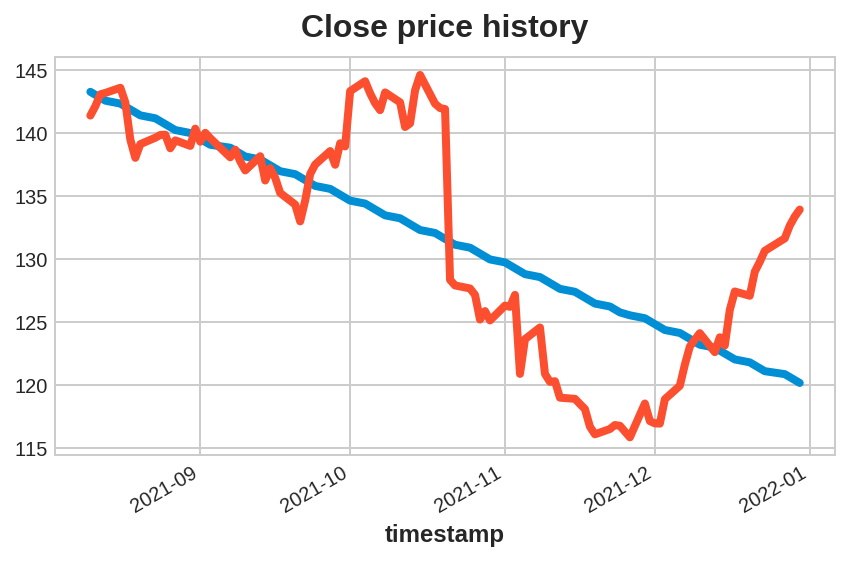

In [45]:
# Plot prediction and real value
df1['Prediction'].plot()
df1['close'].plot()
plt.title('Close price history')

In [46]:
# Evaluating the model
r2_score(df1['close'], df1['Prediction'])

0.5400181860062155

In [47]:
# Predict next day's price
lin_reg.coef_ * len(df1) + 1 + lin_reg.intercept_

array([120.89861212])